In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from pylab import*
import datetime as dt
import seaborn as sns

In [2]:
from sklearn.model_selection import (GridSearchCV, 
                                     cross_val_score,
                                     RandomizedSearchCV,
                                     cross_validate,
                                     StratifiedKFold)

In [3]:
#Corremos el ejercicio 1 de la tarea anterior.
%run ../Tarea_1./Tarea1_ej1.ipynb

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   _id_              50000 non-null  int64         
 1   _id2_             50000 non-null  int64         
 2   comp_mixto1       50000 non-null  float64       
 3   inversion         50000 non-null  float64       
 4   fecha_inicio      50000 non-null  datetime64[ns]
 5   comp_interno1     50000 non-null  float64       
 6   comp_interno2     50000 non-null  object        
 7   comp_interno3     50000 non-null  float64       
 8   comp_interno4     50000 non-null  float64       
 9   categoria1        50000 non-null  float64       
 10  categoria2        50000 non-null  float64       
 11  categoria3        50000 non-null  float64       
 12  comp_externo1     47831 non-null  float64       
 13  comp_externo2     44410 non-null  float64       
 14  comp_externo3     4999

<ipython-input-3-0d46a4e85529>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_1['porc_inv'] = final['inversion'] / tot_inv


In [4]:
#Creamos una copia de la tabla final_1 del ejercicio 1 de la tarea anterior.
copy_final_1 = final_1.copy()
copy_final_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   _id_             50000 non-null  object        
 1   mes_informacion  49352 non-null  datetime64[ns]
 2   inversion        50000 non-null  float64       
 3   porc_inv         50000 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 1.9+ MB


In [5]:
#Creamos una nueva tabla sin datos faltantes en las fechas.
datos1 = copy_final_1.dropna()
datos1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   _id_             49352 non-null  object        
 1   mes_informacion  49352 non-null  datetime64[ns]
 2   inversion        49352 non-null  float64       
 3   porc_inv         49352 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 1.9+ MB


In [6]:
#Creamos una condición que nos permita filtrar a los clientes que son aptos para recibir el crédito.
mask = ((datos1['porc_inv'] > np.percentile(datos1['porc_inv'], 90)) | (mini & maxi ) )

In [7]:
#Creamos un indicador para marcar a los clientes aptos para el crédito y los que no.
datos1['target'] = 0 #No aptos.
datos1.loc[mask,'target'] = 1 #Aptos.

<ipython-input-7-79800bf3224b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos1['target'] = 0 #No aptos.
C:\Users\jonat\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [8]:
#Las fechas las separamos de tal forma que el día, el mes y el año estén cada uno en una columna separada.
datos1['Year'] = datos1['mes_informacion'].dt.year #Año.
datos1['Month'] = datos1['mes_informacion'].dt.month #Mes.
datos1['Day'] = datos1['mes_informacion'].dt.day #Día.

<ipython-input-8-e01fcf106195>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos1['Year'] = datos1['mes_informacion'].dt.year #Año.
<ipython-input-8-e01fcf106195>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos1['Month'] = datos1['mes_informacion'].dt.month #Mes.
<ipython-input-8-e01fcf106195>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [9]:
#Creamos la tabla que utilizaremos para los algoritmos que incluyen los cambios antes mencionados.
rdy_table = datos1[['_id_','Year','Month','Day','inversion','porc_inv','target']]
rdy_table.head()

,_id_,Year,Month,Day,inversion,porc_inv,target
0,78213,2021,5,1,0.000000,0.000000e+00,0
1,76457,2021,5,1,0.041039,1.258548e-08,0
2,40666,2019,5,1,0.000000,0.000000e+00,0
3,8329,2021,5,1,0.000000,0.000000e+00,0
4,68389,2021,5,1,77.422135,2.374342e-05,0


In [10]:
def performance_evaluation_report(model, X_test, y_test, show_plot=False, labels=None, show_pr_curve=False):
    '''
    Function for creating a performance report of a classification model.
    
    Parameters
    ----------
    model : scikit-learn estimator
        A fitted estimator for classification problems.
    X_test : pd.DataFrame
        DataFrame with features matching y_test
    y_test : array/pd.Series
        Target of a classification problem.
    show_plot : bool
        Flag whether to show the plot
    labels : list
        List with the class names.
    show_pr_curve : bool
        Flag whether to also show the PR-curve. For this to take effect, 
        show_plot must be True.
        
    Return
    ------
    stats : pd.Series
        A series with the most important evaluation metrics
    '''

    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    cm = metrics.confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_prob)
    roc_auc = metrics.auc(fpr, tpr)

    precision, recall, thresholds = metrics.precision_recall_curve(
        y_test, y_pred_prob)
    pr_auc = metrics.auc(recall, precision)

    if show_plot:

        if labels is None:
            labels = ['Negative', 'Positive']

        N_SUBPLOTS = 3 if show_pr_curve else 2
        PLOT_WIDTH = 15 if show_pr_curve else 12
        PLOT_HEIGHT = 5 if show_pr_curve else 6

        fig, ax = plt.subplots(
            1, N_SUBPLOTS, figsize=(PLOT_WIDTH, PLOT_HEIGHT))
        fig.suptitle('Performance Evaluation', fontsize=16)

        sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap='BuGn_r', square=True, cbar=False, ax=ax[0],
                    annot_kws={"ha": 'center', "va": 'center'})
        ax[0].set(xlabel='Predicted label',
                  ylabel='Actual label', title='Confusion Matrix')
        ax[0].xaxis.set_ticklabels(labels)
        ax[0].yaxis.set_ticklabels(labels)

        ax[1].plot(fpr, tpr, 'b-', label=f'ROC-AUC = {roc_auc:.2f}')
        ax[1].set(xlabel='False Positive Rate',
                  ylabel='True Positive Rate', title='ROC Curve')
        ax[1].plot(fp/(fp+tn), tp/(tp+fn), 'ro',
                   markersize=8, label='Decision Point')
        ax[1].plot([0, 1], [0, 1], 'r--')
        ax[1].legend(loc='lower right')

        if show_pr_curve:

            ax[2].plot(recall, precision, label=f'PR-AUC = {pr_auc:.2f}')
            ax[2].set(xlabel='Recall', ylabel='Precision',
                      title='Precision-Recall Curve')
            ax[2].legend()

#         print('#######################')
#         print('Evaluation metrics ####')
#         print('#######################')
#         print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred):.4f}')
#         print(f'Precision: {metrics.precision_score(y_test, y_pred):.4f}')
#         print(f'Recall (Sensitivity): {metrics.recall_score(y_test, y_pred):.4f}')
#         print(f'Specificity: {(tn / (tn + fp)):.4f}')
#         print(f'F1-Score: {metrics.f1_score(y_test, y_pred):.4f}')
#         print(f"Cohen's Kappa: {metrics.cohen_kappa_score(y_test, y_pred):.4f}")

    stats = {'accuracy': metrics.accuracy_score(y_test, y_pred),
             'precision': metrics.precision_score(y_test, y_pred),
             'recall': metrics.recall_score(y_test, y_pred),
             'specificity': (tn / (tn + fp)),
             'f1_score': metrics.f1_score(y_test, y_pred),
             'cohens_kappa': metrics.cohen_kappa_score(y_test, y_pred),
             'roc_auc': roc_auc,
             'pr_auc': pr_auc}

    return stats

In [11]:
#t_1 = final.copy()
#t = t_1.dropna()

In [12]:
"""
#Creamos una condición que nos permita filtrar a los clientes que son aptos para recibir el crédito.

#Asignamos a una variable el valor máximo de la columna "mes_informacion" que se encuentra en la tabla "t_1".
fecha_max = t['mes_informacion'].max()

#Asignamos a una variable la suma de todos los valores contenidos en la columna "inversion" de la tabla "t_1".
tot_inv = t['inversion'].sum()

#Obtenemos la fecha un año atrás de la fecha máxima obtenida de la columna "mes_informacion" que se encuentra en la tabla "t_1".
fecha_ant = fecha_max- timedelta(weeks = 52)

#Creamos una nueva columna en la tabla "t_1", llamada "porc_inv", la cual almacenará las inversiones expresadas en porcentaje.
t['porc_inv'] = t['inversion'] / tot_inv

#Asignamos a una variable el percentil al 90% de los valores que representan los porcentajes de inversión.
thresh = np.percentile(t['porc_inv'], 90)

#Asignamos a una variable todas aquellas fechas que sean mayores al 2020-05-02.
mini = t['mes_informacion'] > fecha_ant

#Asignamos a una variable todas aquellas fechas que sean menores al 2020-05-02.
maxi = t['mes_informacion'] < fecha_ant

#Asignamos a una variable a aquellos valores cuyo mes de información no es más antigüo a un año o que su porcentaje de inversion sea mayor al percentil del 90%
mask = ( (t['porc_inv'] > thresh) | (mini & maxi ) )

"""

'\n#Creamos una condición que nos permita filtrar a los clientes que son aptos para recibir el crédito.\n\n#Asignamos a una variable el valor máximo de la columna "mes_informacion" que se encuentra en la tabla "t_1".\nfecha_max = t[\'mes_informacion\'].max()\n\n#Asignamos a una variable la suma de todos los valores contenidos en la columna "inversion" de la tabla "t_1".\ntot_inv = t[\'inversion\'].sum()\n\n#Obtenemos la fecha un año atrás de la fecha máxima obtenida de la columna "mes_informacion" que se encuentra en la tabla "t_1".\nfecha_ant = fecha_max- timedelta(weeks = 52)\n\n#Creamos una nueva columna en la tabla "t_1", llamada "porc_inv", la cual almacenará las inversiones expresadas en porcentaje.\nt[\'porc_inv\'] = t[\'inversion\'] / tot_inv\n\n#Asignamos a una variable el percentil al 90% de los valores que representan los porcentajes de inversión.\nthresh = np.percentile(t[\'porc_inv\'], 90)\n\n#Asignamos a una variable todas aquellas fechas que sean mayores al 2020-05-02.\n

In [13]:

#Creamos un indicador para marcar a los clientes aptos para el crédito y los que no.
#t['target'] = 0 #No aptos.
#t.loc[mask,'target'] = 1 #Aptos.

In [14]:
#t.info()

In [15]:
t = rdy_table.copy()
del t['_id_']
t.head()

,Year,Month,Day,inversion,porc_inv,target
0,2021,5,1,0.000000,0.000000e+00,0
1,2021,5,1,0.041039,1.258548e-08,0
2,2019,5,1,0.000000,0.000000e+00,0
3,2021,5,1,0.000000,0.000000e+00,0
4,2021,5,1,77.422135,2.374342e-05,0


In [16]:
X = t.copy()
X.pop('porc_inv')
y = X.pop('target')

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,stratify=y)

In [18]:
num_features = X_train.select_dtypes(include='number').columns.to_list()
num_features

['Year', 'Month', 'Day', 'inversion']

In [19]:
cat_features = X_train.select_dtypes(include='object').columns.to_list()
cat_features

[]

In [20]:
num_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='median'))])

In [21]:
cat_list = [list(X_train[col].dropna().unique()) for col in cat_features]

In [22]:
cat_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                               ('onehot', OneHotEncoder(categories=cat_list, sparse=False,
                                        handle_unknown='error', drop='first'))])

In [23]:
preprocessor = ColumnTransformer(transformers=[
               ('numerical', num_pipeline, num_features),
               ('categorical', cat_pipeline, cat_features)],
               remainder='drop')

In [24]:
dec_tree = DecisionTreeClassifier(random_state=42)

In [25]:
tree_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('classifier', dec_tree)])

In [26]:
tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Year', 'Month', 'Day',
                                                   'inversion']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(categories=[],
                                                                                 drop='first',
                                                             

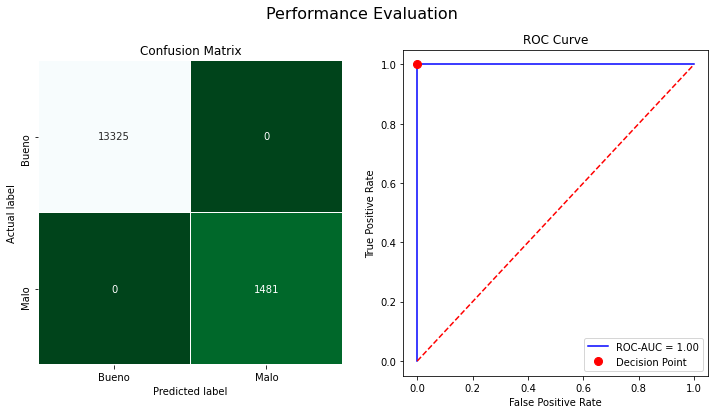

In [27]:
LABELS = ['Bueno', 'Malo']
tree_perf = performance_evaluation_report(tree_pipeline, X_test,y_test, labels=LABELS,show_plot=True)

In [28]:
from sklearn.base import BaseEstimator, TransformerMixin

In [29]:
class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self, n_std=3):
        self.n_std = n_std
    
    def fit(self, X, y = None):
        if np.isnan(X).any(axis=None):
            raise ValueError('''There are missing values in the array! 
                                Please remove them.''')

        mean_vec = np.mean(X, axis=0)
        std_vec = np.std(X, axis=0)
        
        self.upper_band_ = mean_vec + self.n_std * std_vec
        self.lower_band_ = mean_vec - self.n_std * std_vec
        self.n_features_ = len(self.upper_band_)
        
        return self 
    
    def transform(self, X, y = None):
        X_copy = pd.DataFrame(X.copy())
        
        upper_band = np.repeat(
            self.upper_band_.reshape(self.n_features_, -1), 
            len(X_copy), 
            axis=1).transpose()
        lower_band = np.repeat(
            self.lower_band_.reshape(self.n_features_, -1), 
            len(X_copy), 
            axis=1).transpose()
        
        X_copy[X_copy >= upper_band] = upper_band
        X_copy[X_copy <= lower_band] = lower_band
        
        return X_copy.values

In [30]:
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('outliers', OutlierRemover())])

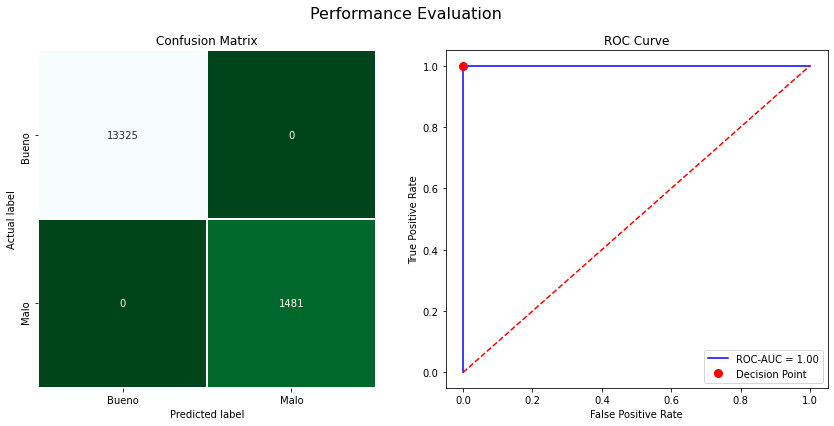

In [31]:
preprocessor = ColumnTransformer(transformers=[('numerical', num_pipeline, num_features),
                                               ('categorical', cat_pipeline, cat_features)],
                                 remainder='drop')

dec_tree = DecisionTreeClassifier(random_state=42)

tree_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', dec_tree)])

tree_pipeline.fit(X_train, y_train)

tree_perf = performance_evaluation_report(tree_pipeline, X_test, 
                                          y_test, labels=LABELS, 
                                          show_plot=True)

plt.tight_layout()
#plt.savefig('images/ch8_im18.png')
plt.show()

In [32]:
from sklearn.model_selection import (GridSearchCV, cross_val_score,
                                                 RandomizedSearchCV,
                                                 cross_validate,
                                                 StratifiedKFold)

In [33]:
k_fold = StratifiedKFold(5, shuffle=True, random_state=42)

In [34]:
cross_val_score(tree_pipeline, X_train, y_train, cv=k_fold)

array([0.99985528, 1.        , 1.        , 1.        , 1.        ])

In [35]:
cross_validate(tree_pipeline, X_train, y_train, cv=k_fold,
                           scoring=['accuracy', 'precision', 'recall','roc_auc'])

{'fit_time': array([0.19274473, 0.07304859, 0.10226679, 0.17970729, 0.08306932]),
 'score_time': array([0.15350032, 0.09086514, 0.15700436, 0.12387085, 0.06403327]),
 'test_accuracy': array([0.99985528, 1.        , 1.        , 1.        , 1.        ]),
 'test_precision': array([0.99855491, 1.        , 1.        , 1.        , 1.        ]),
 'test_recall': array([1., 1., 1., 1., 1.]),
 'test_roc_auc': array([0.9999196, 1.       , 1.       , 1.       , 1.       ])}

In [36]:
param_grid = {'classifier__criterion': ['entropy', 'gini'],
               'classifier__max_depth': range(3, 11),
               'classifier__min_samples_leaf': range(2, 11)}

In [37]:
classifier_gs = GridSearchCV(tree_pipeline, param_grid,scoring='recall',cv=k_fold, n_jobs=-1, verbose=1)
classifier_gs.fit(X_train, y_train)
#print(f'Best parameters: {classifier_gs.best_params_}')
#print(f'Recall (Training set): {classifier_gs.best_score_:.4f}')
#print(f'Recall (Test set): {metrics.recall_score(y_test,classifier_gs.predict(X_test)):.4f}')

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('outliers',
                                                                                          OutlierRemover())]),
                                                                         ['Year',
                                                                          'Month',
                                                                          'Day',
                                                                          'inversion']),
        

In [38]:
print(f'Best parameters: {classifier_gs.best_params_}') 
print(f'Recall (Training set): {classifier_gs.best_score_:.4f}') 
print(f'Recall (Test set): {metrics.recall_score(y_test, classifier_gs.predict(X_test)):.4f}')

Best parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 3, 'classifier__min_samples_leaf': 2}
Recall (Training set): 1.0000
Recall (Test set): 1.0000


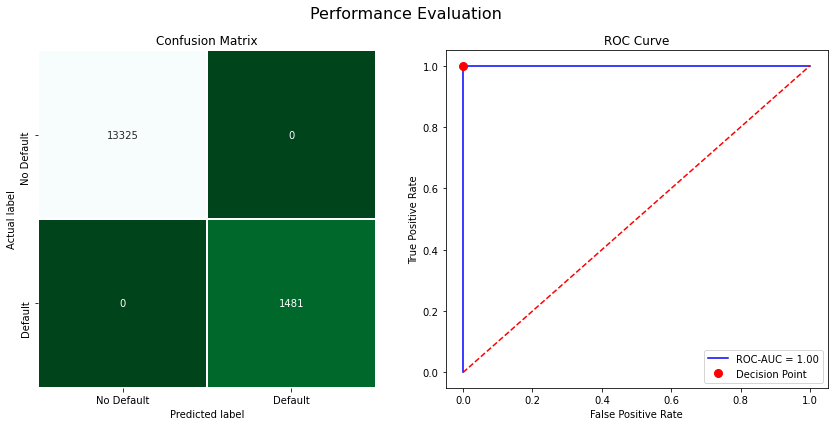

In [39]:
LABELS = ['No Default', 'Default']
tree_gs_perf = performance_evaluation_report(classifier_gs, X_test, 
                                             y_test, labels=LABELS, 
                                             show_plot=True)

plt.tight_layout()
#plt.savefig('images/ch8_im20.png')
plt.show()

In [40]:
from sklearn.metrics import roc_auc_score, roc_curve, mean_squared_error, precision_recall_curve,  accuracy_score

In [41]:
train_scores, val_scores, leaves = {}, {}, {}
for max_depth in range(1, 26):
    print(max_depth, end=' ', flush=True)
    reg_tree = DecisionTreeClassifier(criterion='gini',
                                          max_depth=max_depth,
                                          min_samples_leaf=10,
                                          random_state=42)
    tree_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('classifier', reg_tree)])
    train_scores[max_depth], val_scores[max_depth], leaves[max_depth] = [],[], []
    for train_idx, test_idx in k_fold.split(X_train,y_train):
        X_t, y_t,  = X_train.iloc[train_idx], y_train.iloc[train_idx]
        X_te, y_te = X_train.iloc[test_idx], y_train.iloc[test_idx]
        tree_pipeline.fit(X_t, y_t)
        train_pred = tree_pipeline.predict_proba(X=X_t)[:, 1]
        train_score = roc_auc_score(y_score=train_pred, y_true=y_t)
        #print(train_score)
        train_scores[max_depth].append(train_score)

        test_pred = tree_pipeline.predict_proba(X=X_te)[:, 1]
        val_score = roc_auc_score(y_score=test_pred, y_true=y_te)
        val_scores[max_depth].append(val_score)  
        #print(val_score)
        leaves[max_depth].append(max_depth)
        #reg_tree.fit(X=X_t, y=y_t)

        
        #train_scores[max_depth].append(train_score)

        #test_pred = reg_tree.predict(X=X_test)
        #val_score = np.sqrt(mean_squared_error(
        #    y_pred=test_pred, y_true=y_test))
        #val_scores[max_depth].append(val_score)
        #leaves[max_depth].append(get_leaves_count(reg_tree))

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 

In [42]:
clf_train_scores = pd.DataFrame(train_scores)
clf_valid_scores = pd.DataFrame(val_scores)
bd_leaves = pd.DataFrame(leaves)

In [43]:
leaves

{1: [1, 1, 1, 1, 1],
 2: [2, 2, 2, 2, 2],
 3: [3, 3, 3, 3, 3],
 4: [4, 4, 4, 4, 4],
 5: [5, 5, 5, 5, 5],
 6: [6, 6, 6, 6, 6],
 7: [7, 7, 7, 7, 7],
 8: [8, 8, 8, 8, 8],
 9: [9, 9, 9, 9, 9],
 10: [10, 10, 10, 10, 10],
 11: [11, 11, 11, 11, 11],
 12: [12, 12, 12, 12, 12],
 13: [13, 13, 13, 13, 13],
 14: [14, 14, 14, 14, 14],
 15: [15, 15, 15, 15, 15],
 16: [16, 16, 16, 16, 16],
 17: [17, 17, 17, 17, 17],
 18: [18, 18, 18, 18, 18],
 19: [19, 19, 19, 19, 19],
 20: [20, 20, 20, 20, 20],
 21: [21, 21, 21, 21, 21],
 22: [22, 22, 22, 22, 22],
 23: [23, 23, 23, 23, 23],
 24: [24, 24, 24, 24, 24],
 25: [25, 25, 25, 25, 25]}

In [44]:
clf_train_scores

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [45]:
clf_valid_scores

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
0,0.99992,0.99992,0.99992,0.99992,0.99992,0.99992,0.99992,0.99992,0.99992,0.99992,...,0.99992,0.99992,0.99992,0.99992,0.99992,0.99992,0.99992,0.99992,0.99992,0.99992
1,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,...,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000
2,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,...,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000
3,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,...,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000
4,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,...,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


In [46]:
roc_entrenamiento=[]
for c in clf_train_scores.columns:
    promedio_roc=mean(clf_train_scores[c])
    roc_entrenamiento.append(promedio_roc)
    
roc_validacion=[]
for c in clf_valid_scores.columns:
    promedio_roc=mean(clf_valid_scores[c])
    roc_validacion.append(promedio_roc)

prof=[]
for c in bd_leaves.columns:
    id_=mean(bd_leaves[c])
    prof.append(id_)

In [47]:
roc_entrenamiento

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [48]:
roc_validacion

[0.9999839202444122,
 0.9999839202444122,
 0.9999839202444122,
 0.9999839202444122,
 0.9999839202444122,
 0.9999839202444122,
 0.9999839202444122,
 0.9999839202444122,
 0.9999839202444122,
 0.9999839202444122,
 0.9999839202444122,
 0.9999839202444122,
 0.9999839202444122,
 0.9999839202444122,
 0.9999839202444122,
 0.9999839202444122,
 0.9999839202444122,
 0.9999839202444122,
 0.9999839202444122,
 0.9999839202444122,
 0.9999839202444122,
 0.9999839202444122,
 0.9999839202444122,
 0.9999839202444122,
 0.9999839202444122]

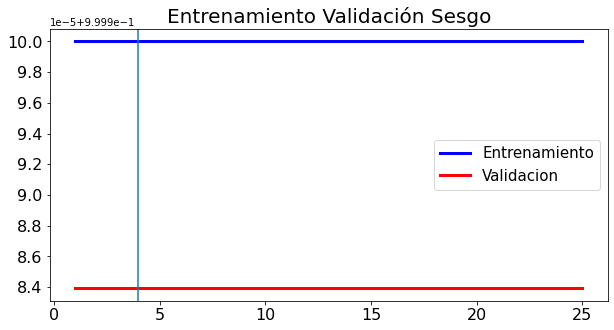

In [49]:
fig, ax = plt.subplots(figsize=(10,5))

ax.set_title("Entrenamiento Validación Sesgo",fontsize=20)
ax.plot(prof,roc_entrenamiento,color="blue",linewidth=3,label="Entrenamiento")
ax.plot(prof,roc_validacion,color="red",linewidth=3,label="Validacion")
#gca().yaxis.set_major_formatter("{x:,.0%}")
xticks(fontsize=16)
yticks(fontsize=16)
axvline(4)
legend(fontsize=15)
show()